<a href="https://colab.research.google.com/github/gatoborrachon/AdvancedAlloyIngot/blob/master/tarea_redes_neuronales_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRERIAS PARA EL EJEMPLO Y LA ACTIVIDAD**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **DATASET IRIS** - EJEMPLO DEMOSTRATIVO PARA LA REALIZACION DE LA ACTIVIDAD

> MODELO DE REDES NEURONALES (RN)



In [3]:
iris = load_iris()

In [10]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: species, dtype: int64

In [ ]:
y.unique() #<-Muestrars los valores unicos

array([0, 1, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train.shape[1]


4

In [ ]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=(X_train.shape[1],))
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=3)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)


In [ ]:
print("comenzando entrenamiento")
historial = modelo.fit(X_train, y_train, epochs=50, batch_size=5, verbose=True)
print("modelo entrenado")

comenzando entrenamiento
Epoch 1/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1369
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1121
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1421
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1254
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1344
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1368
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1381
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1223
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1143
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1118
Epoch 11/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1224
Epoch 12/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1113
Epoch 13/50
24/24 [=====

In [ ]:
loss = modelo.evaluate(X_test, y_test)
print(f'MSE: {loss}')

1/1 [==============================] - 0s 156ms/step - loss: 0.1094
MSE: 0.10942471772432327


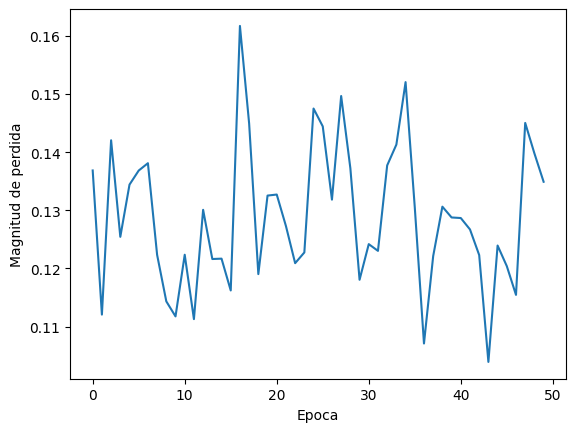

In [ ]:
plt.xlabel('Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [ ]:
#New data
#sepal length (cm), sepal width (cm), petal length (cm),	petal width (cm)
new_data = np.array([[5.9,	3.0,	5.1	,1.8]])
prediction = modelo.predict(new_data)
predicted_class = np.argmax(prediction, axis=1)
species_labels = iris.target_names[predicted_class]
print(f'Predicción: {species_labels[0]}')

1/1 [==============================] - 0s 117ms/step
Predicción: versicolor


# **Dataset Iris - Ejemplo Demostrativo para realizar la actividad**

**DATASET IRIS - EJEMPLO DEMOSTRATIVO PARA LA REALIZACION DE LA ACTIVIDAD**

In [ ]:
# Load the libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Load dataset
iris = load_iris()

# Separate features and target variable
X = iris.data
y = iris.target

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test) # Use the trained model to make predictions on the testing set

In [ ]:
# Evaluate the model performance
print(f'Precisión: {accuracy_score(y_test, y_pred)}') # show precision in console

Precisión: 1.0


In [ ]:
# Evaluate the model performance
print(classification_report(y_test, y_pred, target_names=iris.target_names))
# It's a detailed breakdown of your model's performance on the testing data for a classification task

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#New data
#sepal length (cm), sepal width (cm), petal length (cm),	petal width (cm)
#new_data = np.array([[5.9,	3.0,	5.1	,1.8]])
new_data = np.array([[1.9,	2.0,	3.1	,1.]])
prediction = model.predict(new_data)
print(f'Predicción: {iris.target_names[prediction[0]]}')

Predicción: setosa


In [ ]:
prediction

array([0])

# **AHORA ENTRENA UN MODELO CON LA BASE DE DATOS CANCER**

**RECUERDA HACERLO EN UNA NUEVA PESTAÑA DE GOOGLE COLAB**

---

Objetivo: No es aprender a programar cómo tal, es aprender los pasos para desarollar un modelo computacional con el uso de la inteligencia artificial y cómo usarlo realizando predicciones.

---




Pasos a seguir:

1.   Cargar las bibliotecas y los datos

2.   Divida los datos en conjuntos de entrenamiento y prueba

3.   Entrenar el modelo

4.   Evaluar el modelo

5.   Realizar predicciones sobre nuevos datos (Opcional)

---

Fecha limite de entrega: 01/07/24

In [8]:
# Load the libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Librerias Adicionales
import pandas as pd

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

In [9]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
#Creamos una dataframe para ver como quedan los datos en forma agrupada
BreatCancerDataFrame = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
BreatCancerDataFrame


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
#Creamos una columna para corroborar si es benigno o no, mas por seguir el
#ejemplo de la clase que otra cosa
BreatCancerDataFrame['isBenign'] = breast_cancer.target
BreatCancerDataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,isBenign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
#firstDataGroupX = BreatCancerDataFrame.drop('isBenign', axis=1)
#secondDataGroupY = BreatCancerDataFrame['isBenign']
BreatCancerDataFrame.drop('isBenign', axis=1)

datosDeTrabajoX = breast_cancer.data
datosDeEvaluacionY = breast_cancer.target

datosDeTrabajoX

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(datosDeTrabajoX, datosDeEvaluacionY, test_size=0.2, random_state=42)



#LogisticRegression es un tipo de modelo, existen mas, pero en el ejemplo que
#nos pidieron, por practividad podemos usar este
modelo = LogisticRegression(max_iter=1000)

#Entrenar el modelo
modelo.fit(X_train, Y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [14]:
#Generacion de datos predictorios para posterior evaluacion
datosPredichosY = modelo.predict(X_test)

#Evaluacion de la capacidad de prediccion del modelo contra datos verdaderos
print(f'Precisión: {accuracy_score(Y_test, datosPredichosY)}')
print(classification_report(Y_test, datosPredichosY, target_names=breast_cancer.target_names))


Precisión: 0.956140350877193
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [343]:
#declaramos el tipo de estas variables porque nos lo pide el codigo
valores_aleatorios = []
valores_celulares_aleatorios = []

#Creamos valores aleatorios en la lista "valores_aleatorios"
for _ in range(30):
  valores_aleatorios.append(np.random.uniform(0, 200))

#Convertimos esos valores aleatorios a tipo float, ademas de darles formato a
#3 decimales y meterlos en otra lista llamada "valores_celulares_aleatorios"
for x in valores_aleatorios:
  valores_celulares_aleatorios.append(float("{:.3f}".format(x)))

#convertimos la lista a una array
array_valores_celulares_aleatorios = np.array([valores_celulares_aleatorios])

#hacemos un intento de prediccion con esos valores
ejercicio_de_prediccion = modelo.predict(array_valores_celulares_aleatorios)

print(f'Predicción: {breast_cancer.target_names[ejercicio_de_prediccion[0]]}')



Predicción: malignant
